In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pty
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_excel("./hp_report.xlsx")
print("Data has been uploaded")

data.head()

Data has been uploaded


,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [5]:
le_age = LabelEncoder()
le_departments = LabelEncoder()
le_severity = LabelEncoder()

data['Severity of Illness'] = le_severity.fit_transform(data['Severity of Illness'])
data['Department'] = le_departments.fit_transform(data['Department'])

data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,3,R,F,2.0,31397,7.0,Emergency,0,2,51-60,4911,0-10
1,2,2,c,5,Z,2,3,S,F,2.0,31397,7.0,Trauma,0,2,51-60,5954,41-50
2,3,10,e,1,X,2,1,S,E,2.0,31397,7.0,Trauma,0,2,51-60,4745,31-40
3,4,26,b,2,Y,2,3,R,D,2.0,31397,7.0,Trauma,0,2,51-60,7272,41-50
4,5,26,b,2,Y,2,3,S,D,2.0,31397,7.0,Trauma,0,2,51-60,5558,41-50


In [6]:
departments = []
for i in range(0,5):
    departments.append(le_departments.inverse_transform([i]))

departments = np.squeeze(np.array(departments))
print(departments)

['TB & Chest disease' 'anesthesia' 'gynecology' 'radiotherapy' 'surgery']


In [7]:
severities = []

for i in range(0,3):
    severities.append(le_severity.inverse_transform([i]))

severities = np.squeeze(np.array(severities))
print(severities)

['Extreme' 'Minor' 'Moderate']


In [9]:
data_shrinked = data.iloc[:1000, :]

print(data_shrinked.shape)

(1000, 18)


c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 84.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 10.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 86.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 28.8% of the points

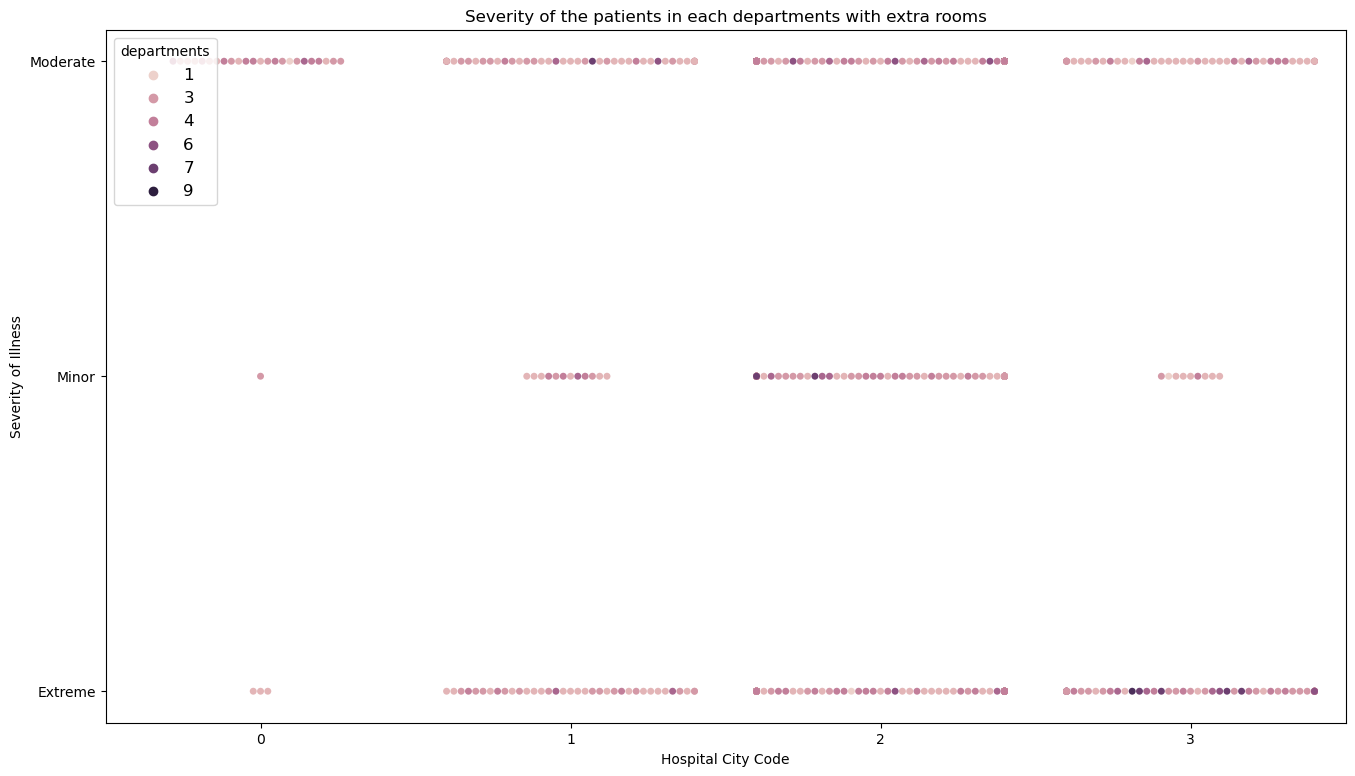

In [10]:
plt.figure(figsize=(16,9))
sns.swarmplot(data_shrinked, x='Department', y='Severity of Illness', hue="Available Extra Rooms in Hospital")
plt.title("Severity of the patients in each departments with extra rooms", loc="center")
plt.xlabel("Hospital City Code")
plt.ylabel("Severity of Illness")
plt.yticks([0,1,2], severities)
plt.legend(loc="upper left", fontsize=12, title="departments")
plt.show()